<a href="https://colab.research.google.com/github/nanditoadi/TA_DKP_NANDITO-ADI-SYAHPUTRA_21120123120023_PENDAFTARAN-KURSUS-MUSIK/blob/main/Another_copy_of_YOLO11CustomObjectDetectionCompleteFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**How to Train YOLO11 Object Detection Model on a Custom Dataset**

In [9]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


**Step 01 # Install the Ultralytics Package**

In [10]:
!pip install ultralytics

**Step 02 # Import All the Requried Libraries**

In [11]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/107.7 GB disk)


In [12]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nr4ezDakBqk24xO98DgD")
project = rf.workspace("facial-expression-detection").project("ekspresi1")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [14]:
dataset.location

'/content/ekspresi1-2'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=100 imgsz=640 save_period=10

100% 5.35M/5.35M [00:00<00:00, 67.0MB/s]
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/ekspresi1-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

**Step # 05 Examine Training Results**

In [16]:
from google.colab import files
files.download('/content/runs/detect/train/P_curve.png')

FileNotFoundError: Cannot find file: /content/runs/detect/train/P_curve.png

In [ ]:
Image("/content/runs/detect/train/P_curve.png", width=600)

FileNotFoundError: No such file or directory: '/content/runs/detect/train/P_curve.png'

FileNotFoundError: No such file or directory: '/content/runs/detect/train/P_curve.png'

<IPython.core.display.Image object>

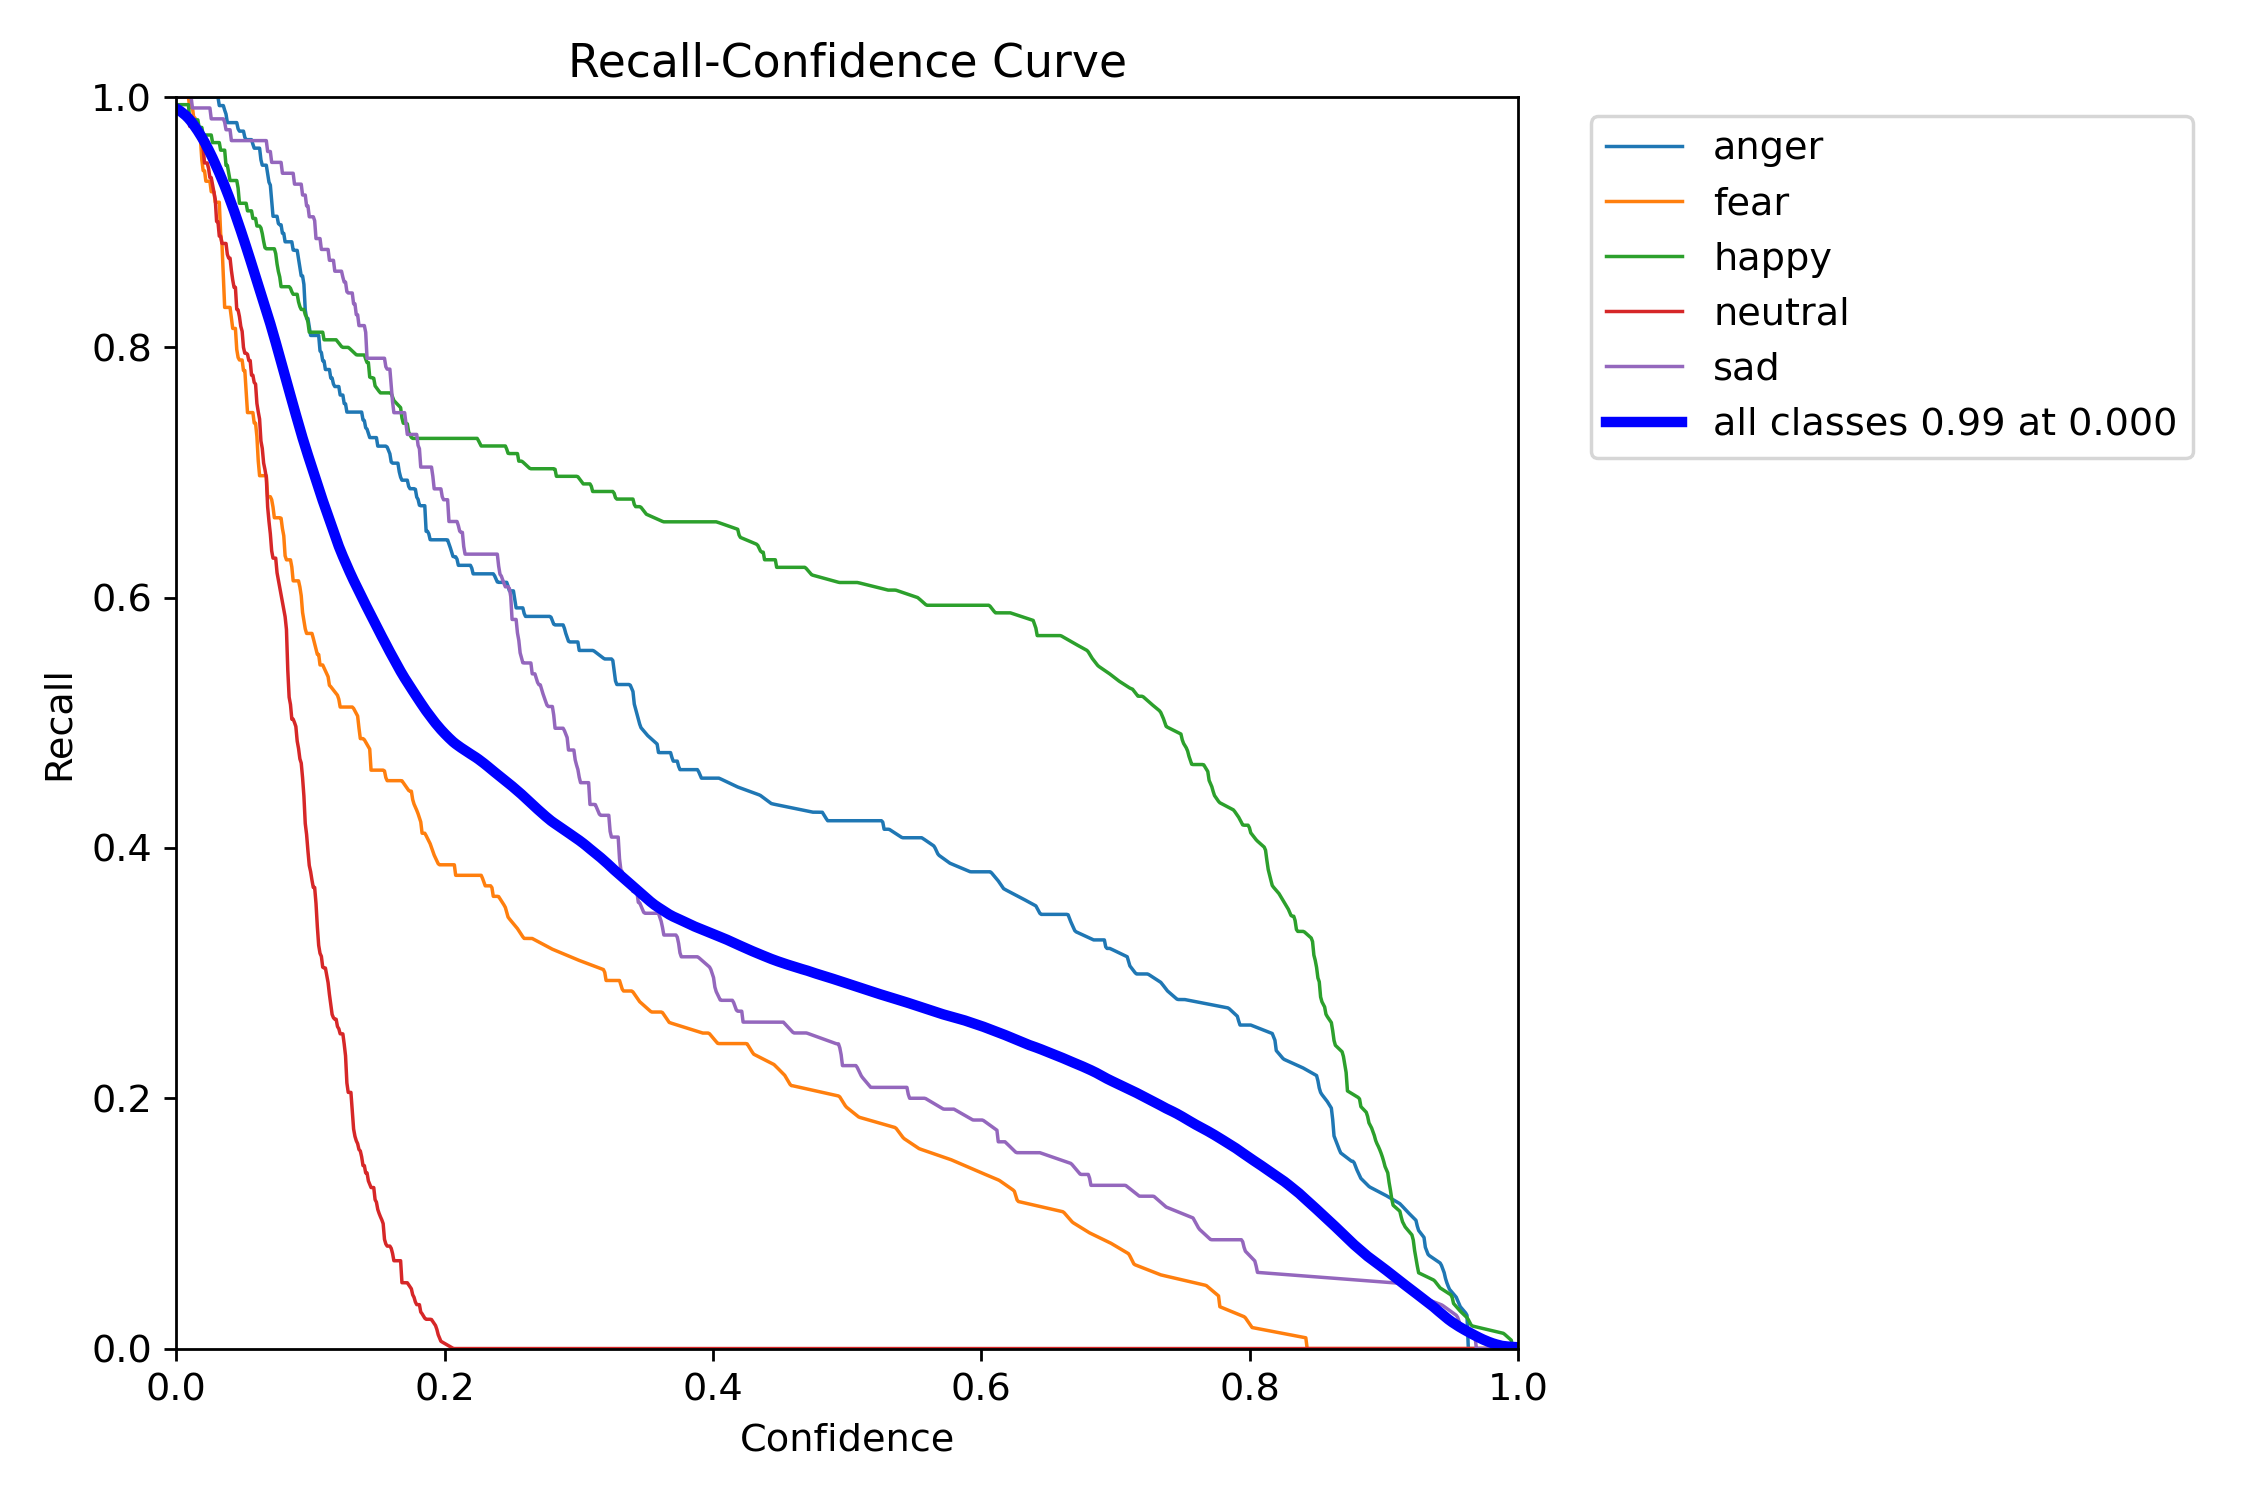

In [ ]:
from IPython.display import Image
Image("/content/runs/detect/train/R_curve.png", width=600)

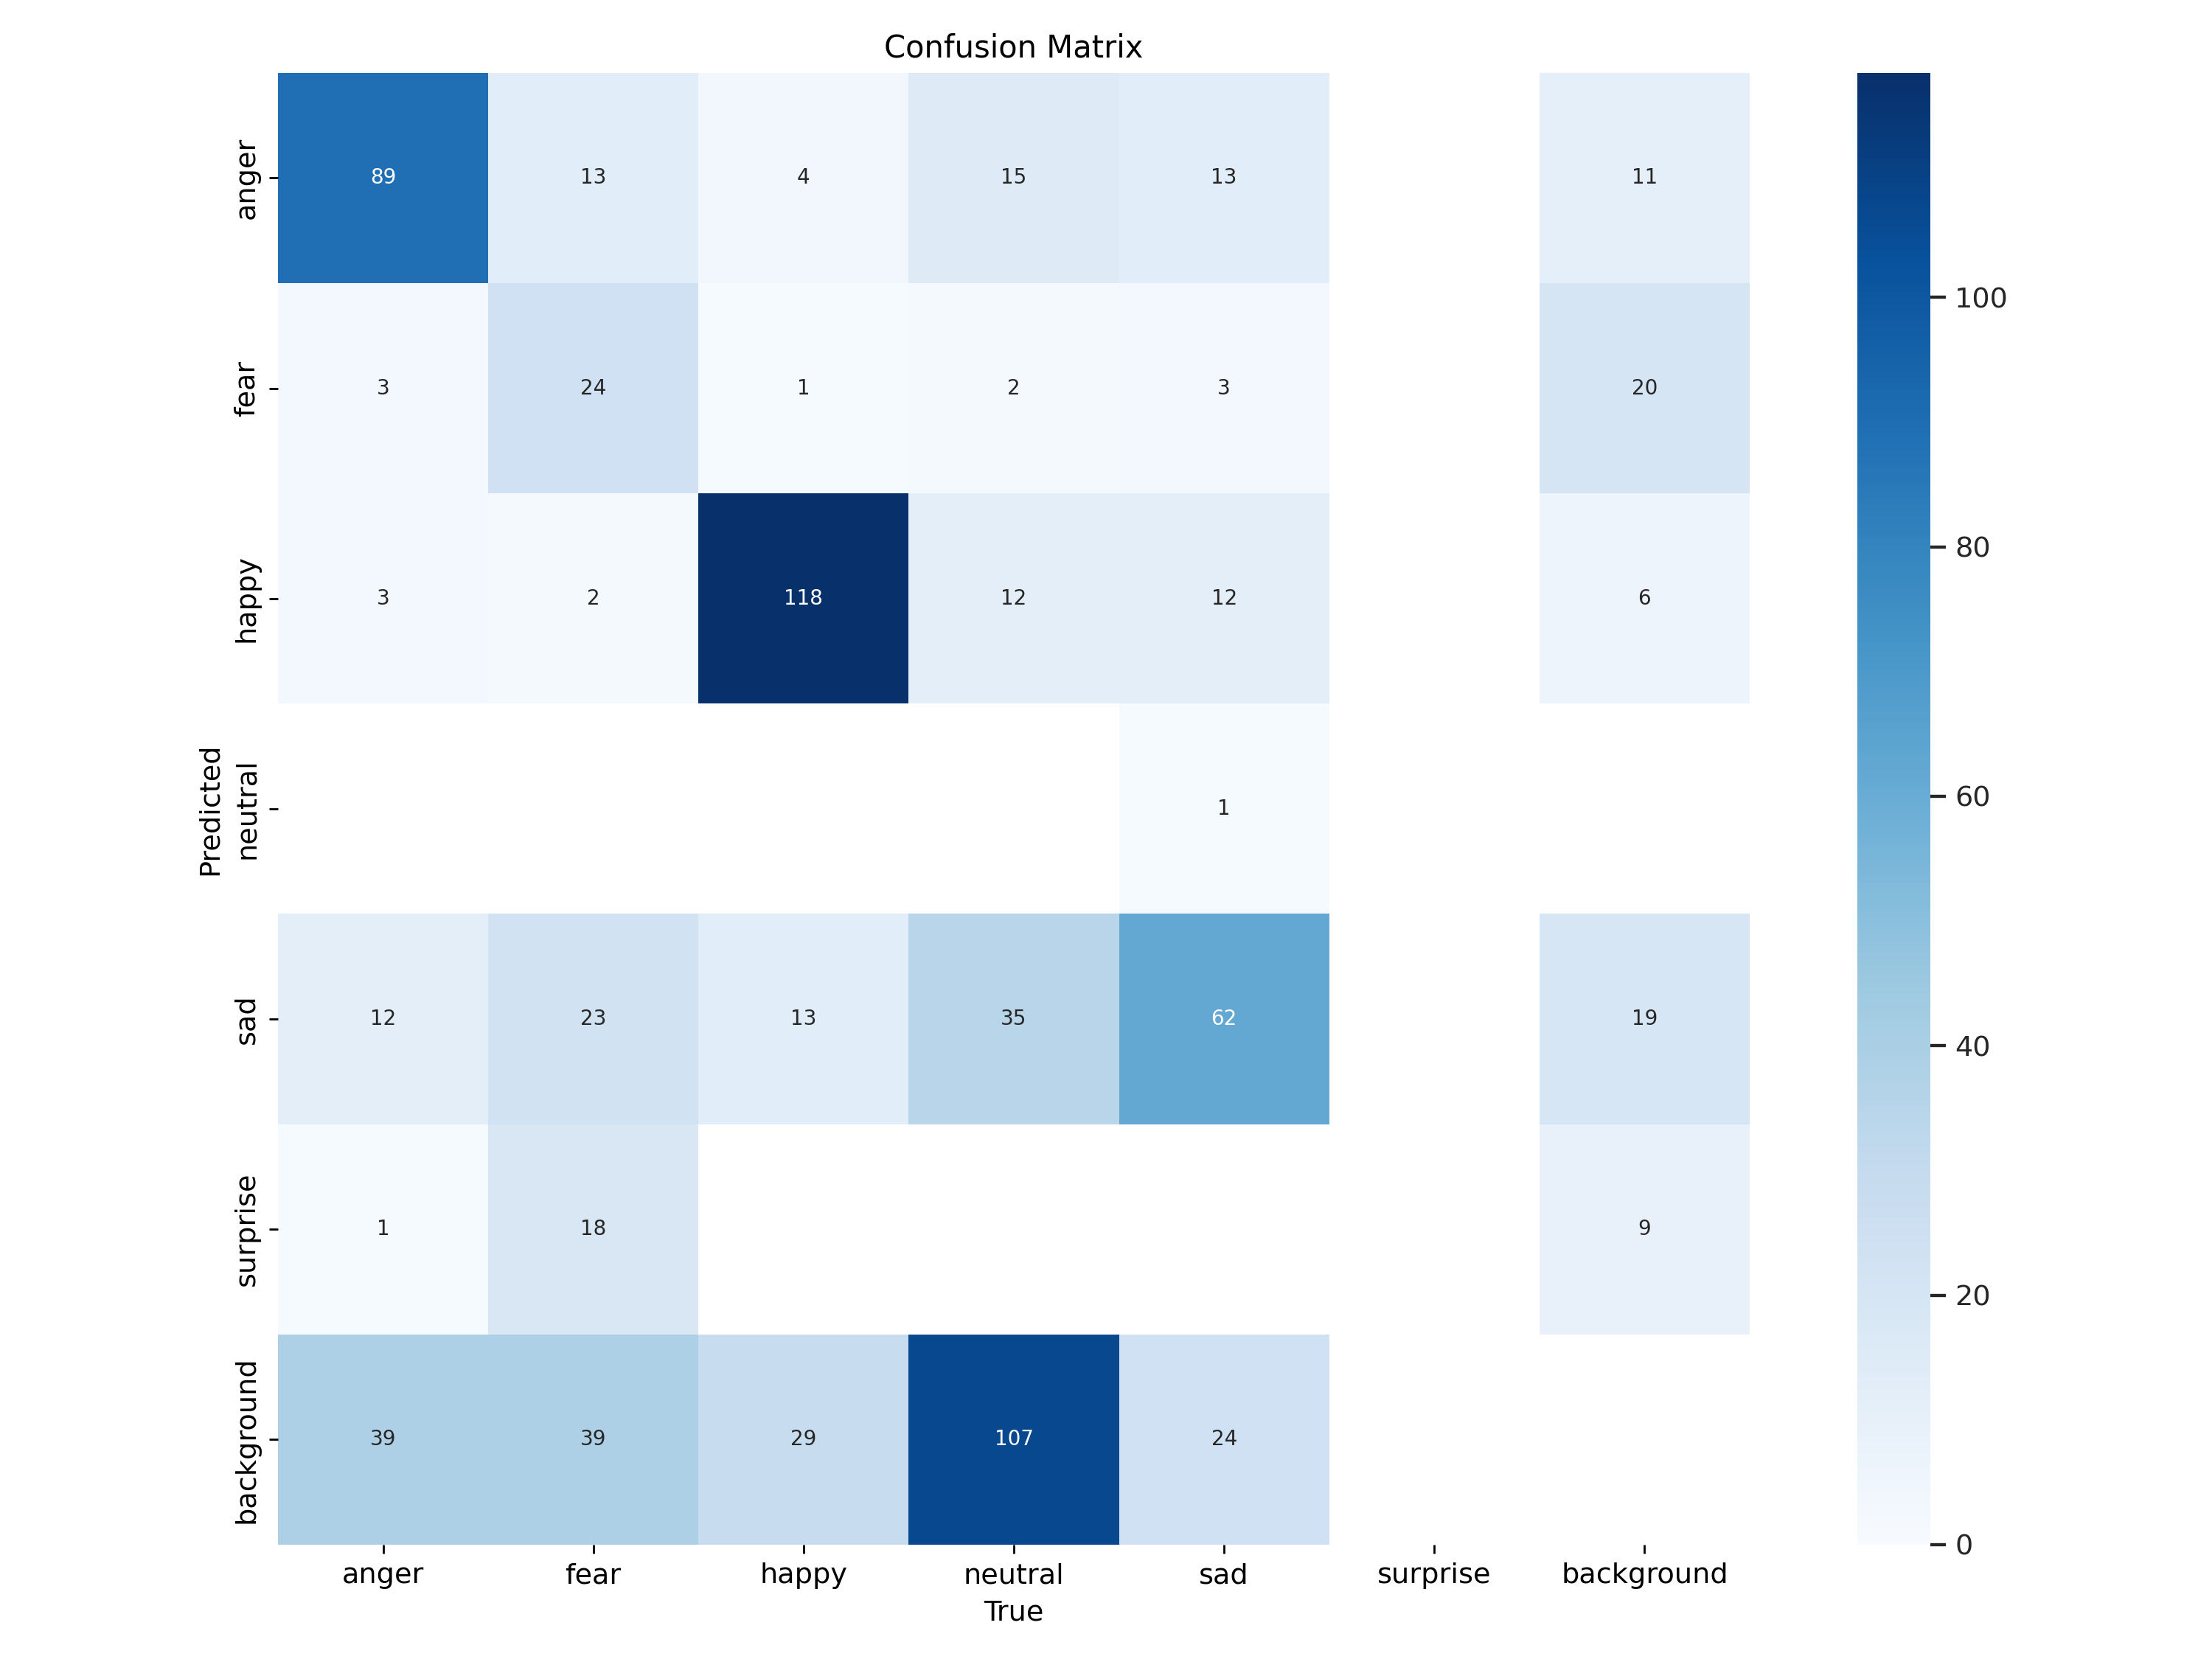

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

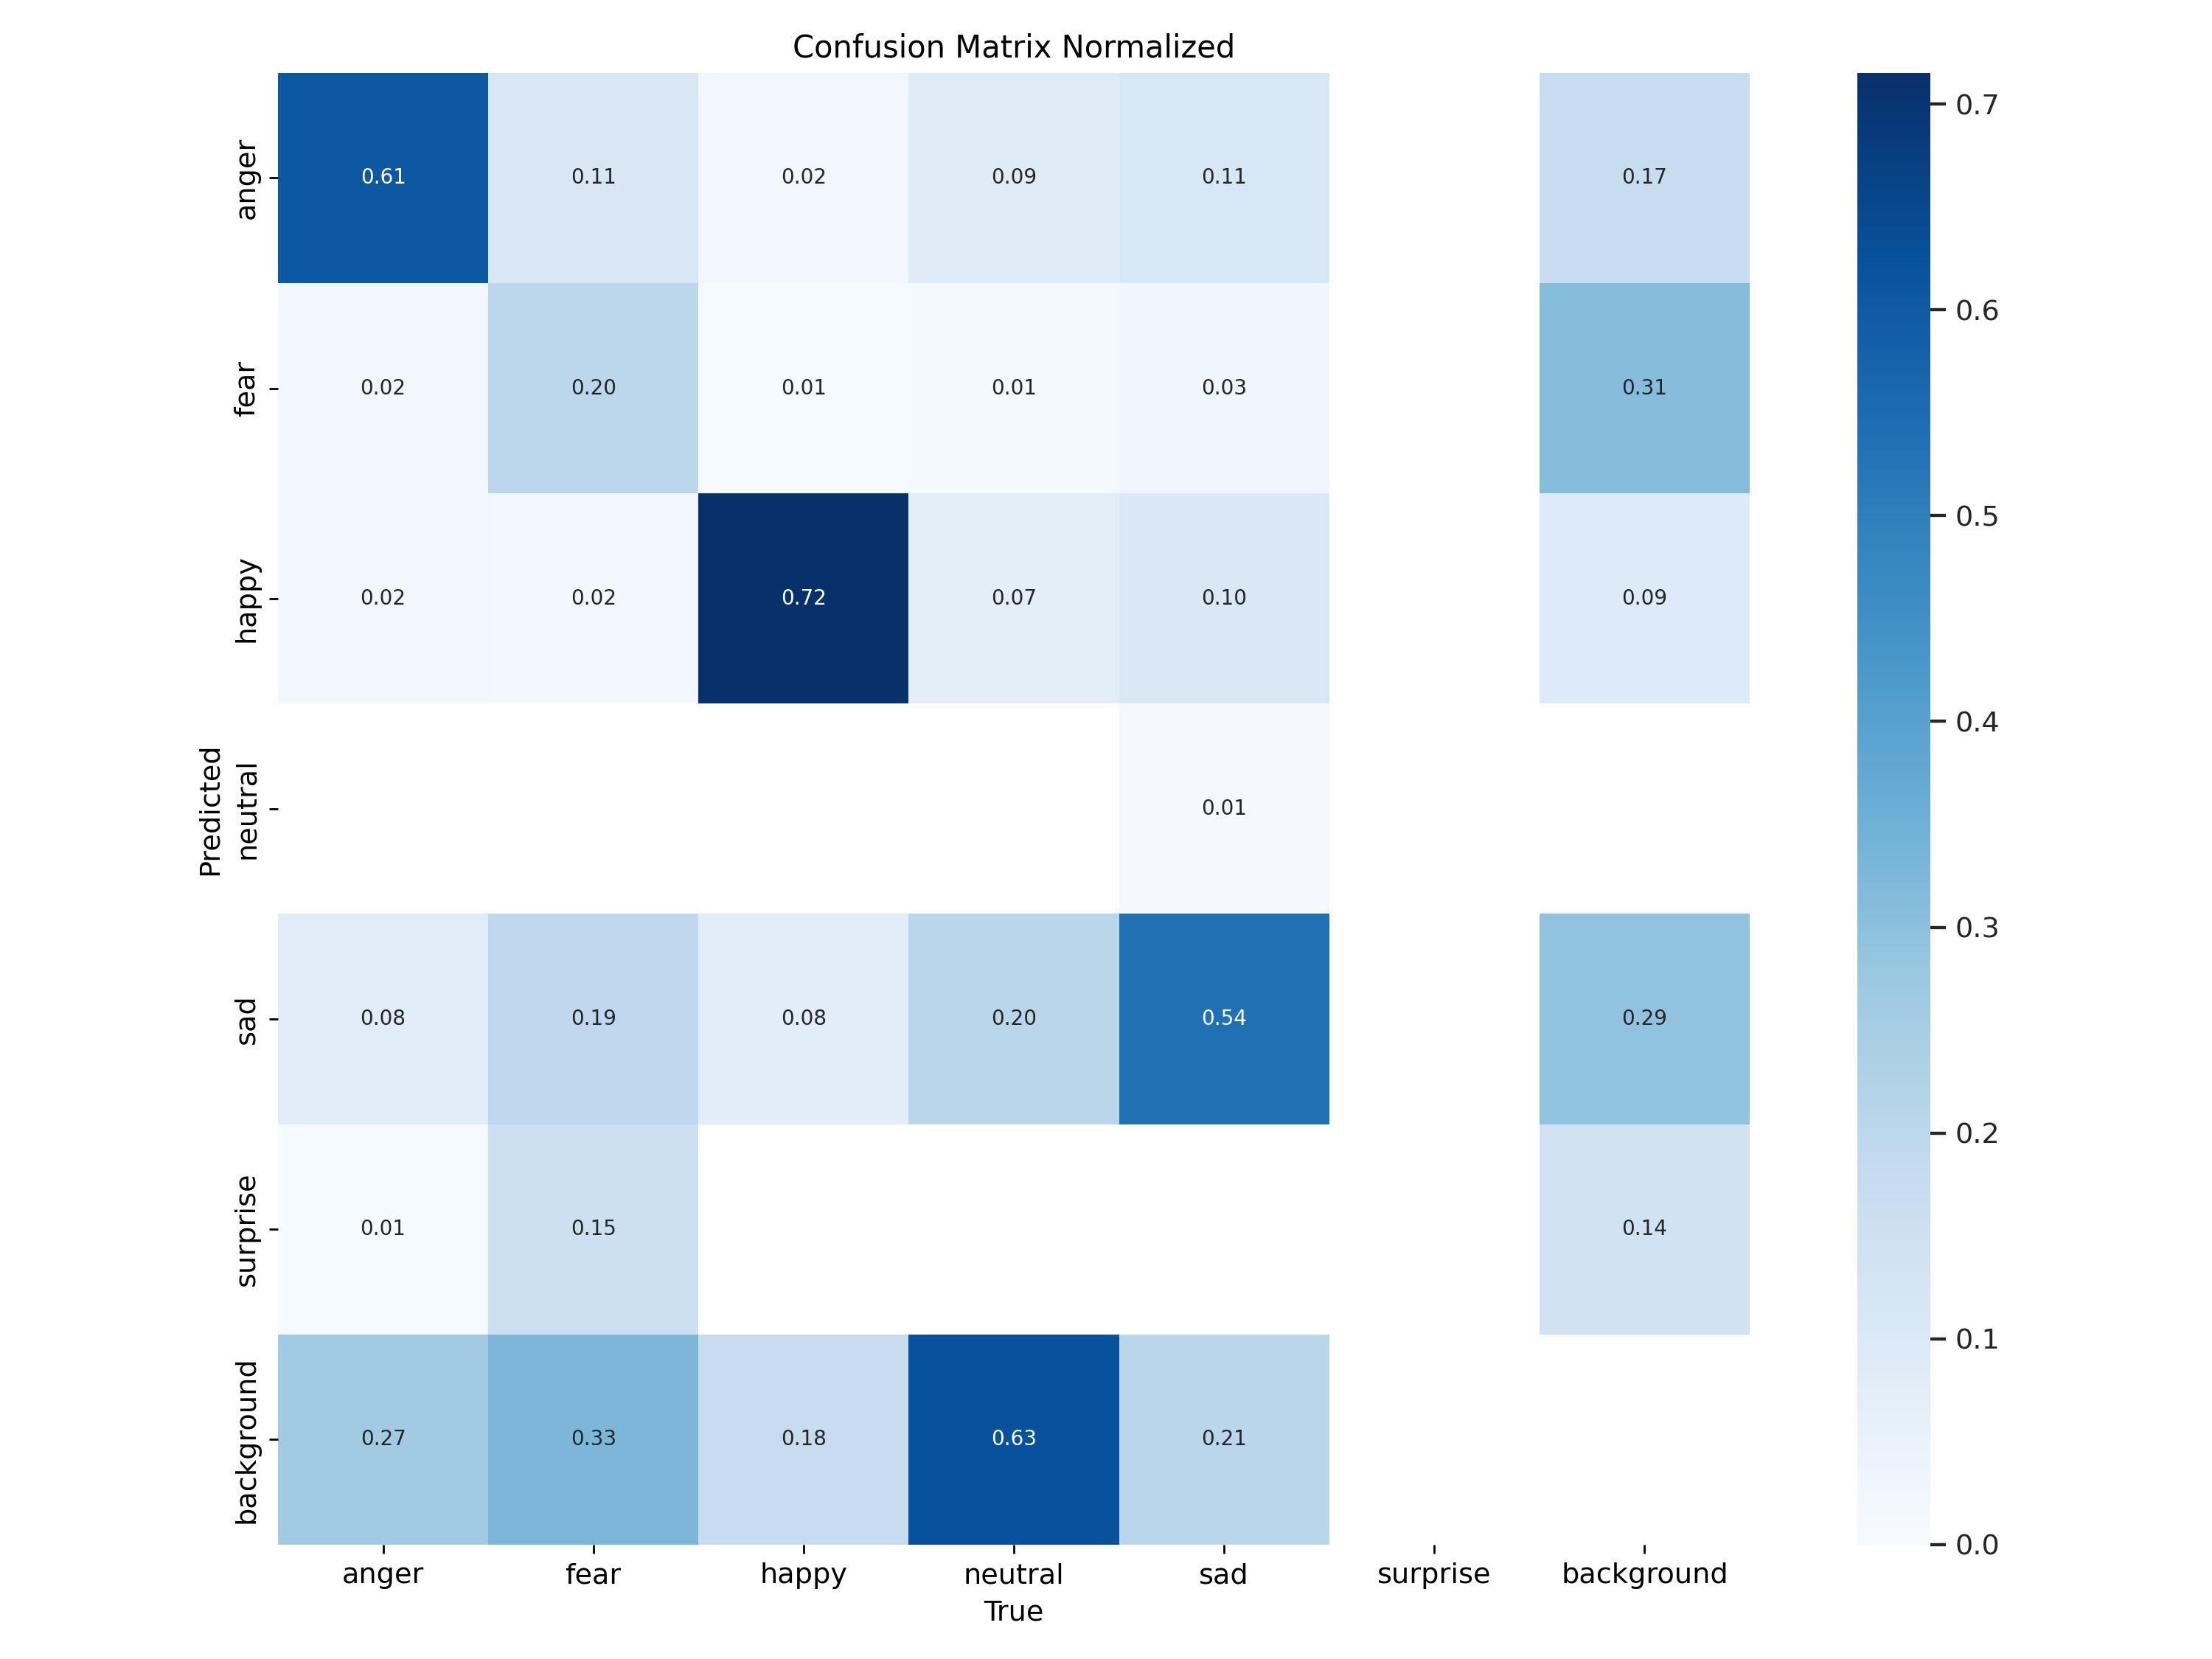

In [ ]:
Image("/content/runs/detect/train/confusion_matrix_normalized.png", width=600)

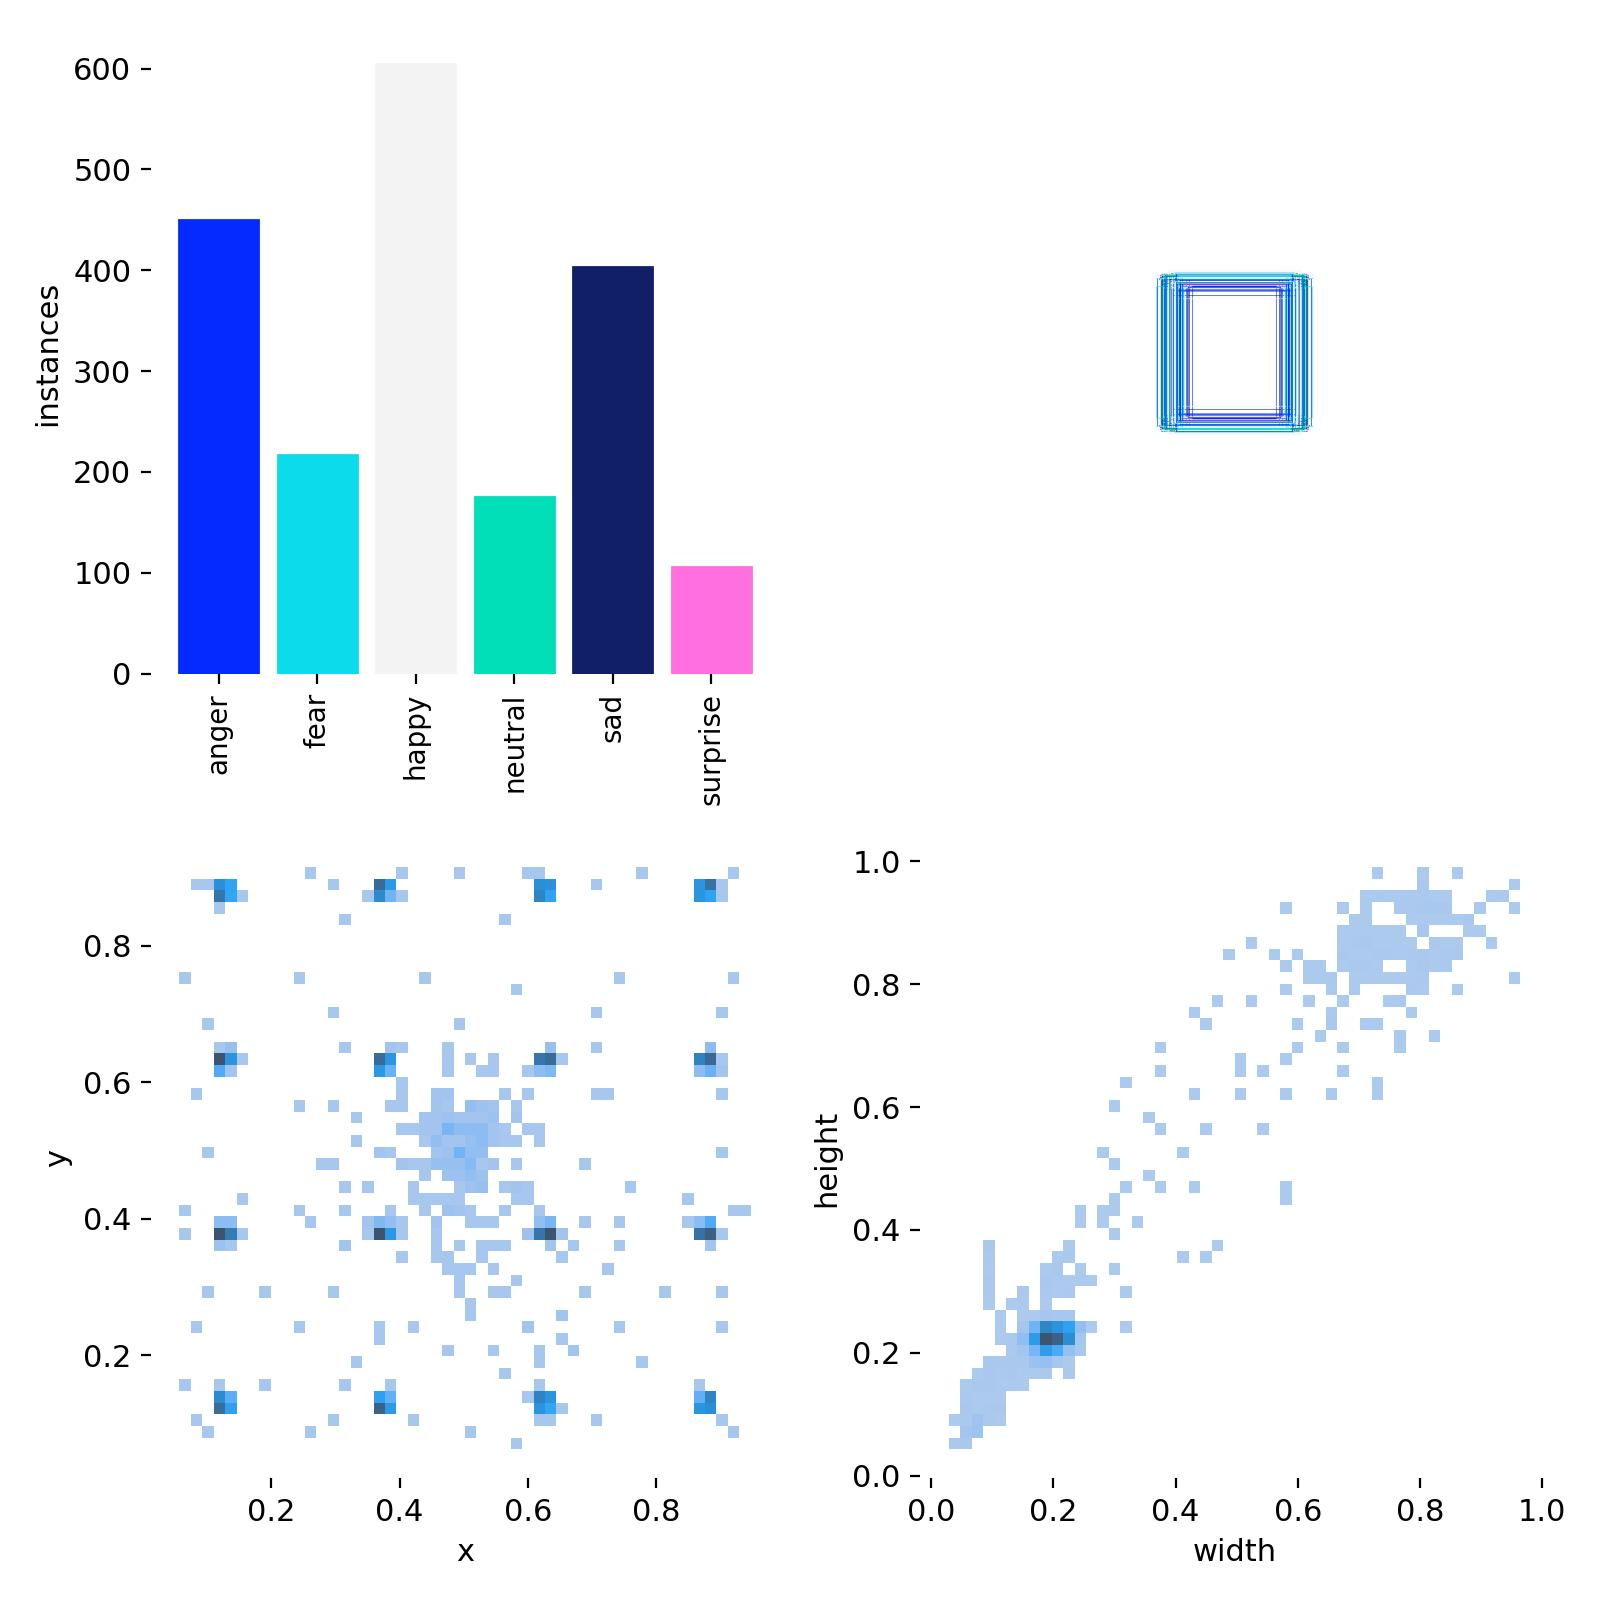

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

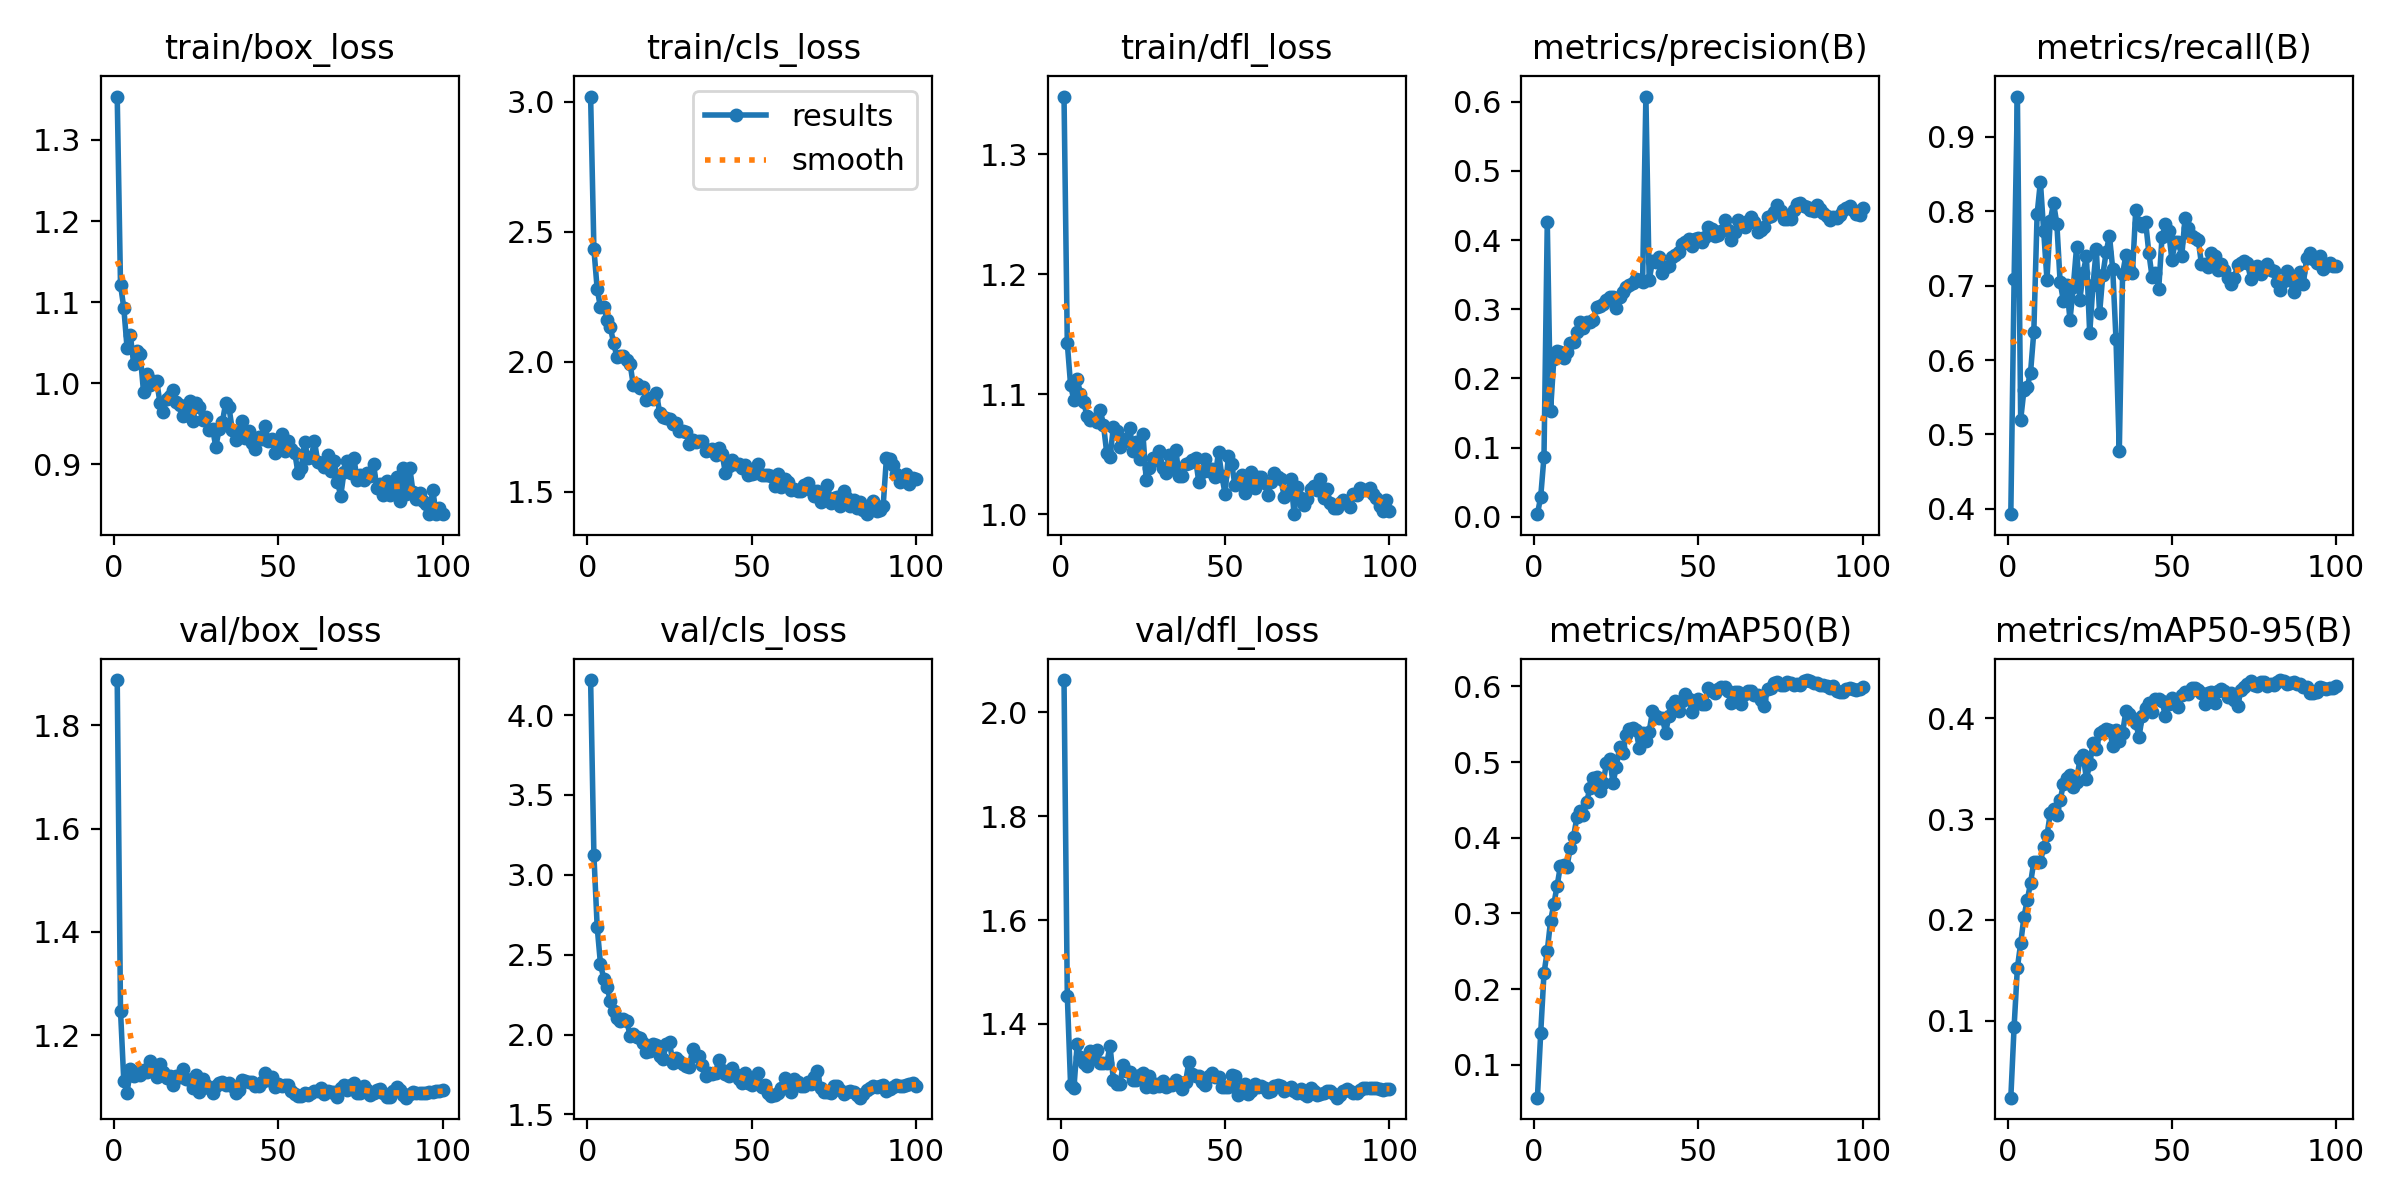

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

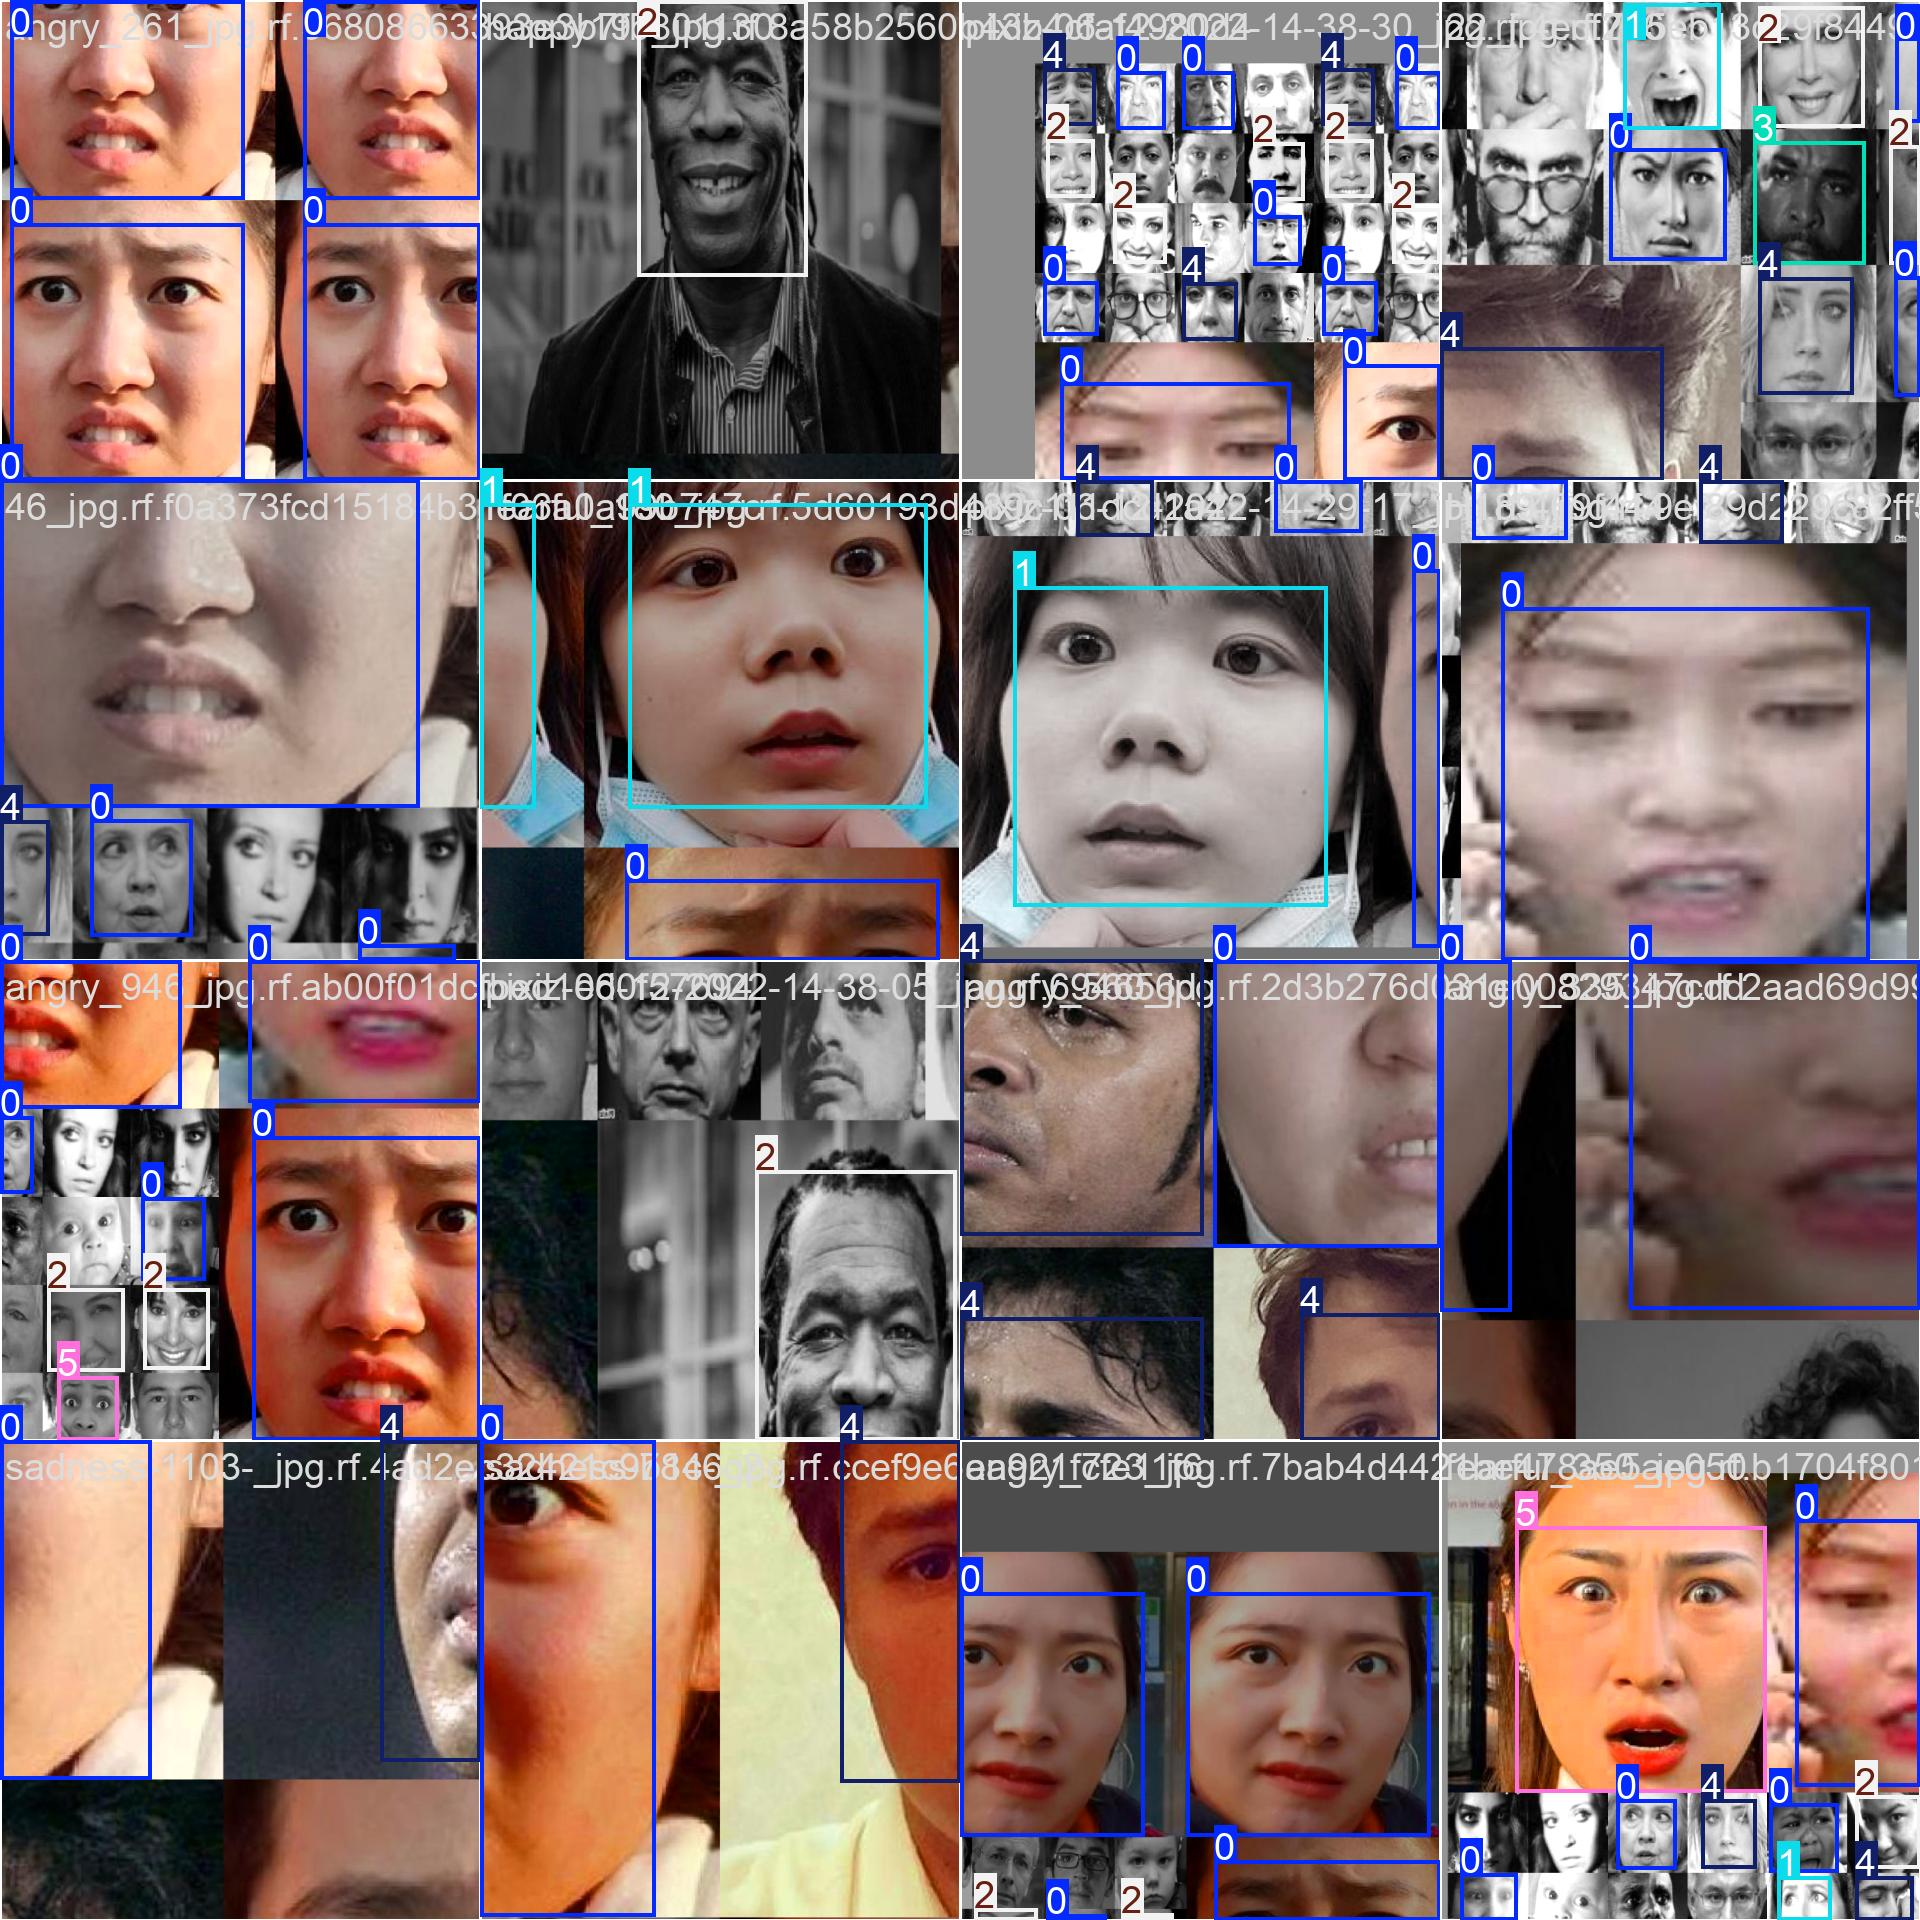

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

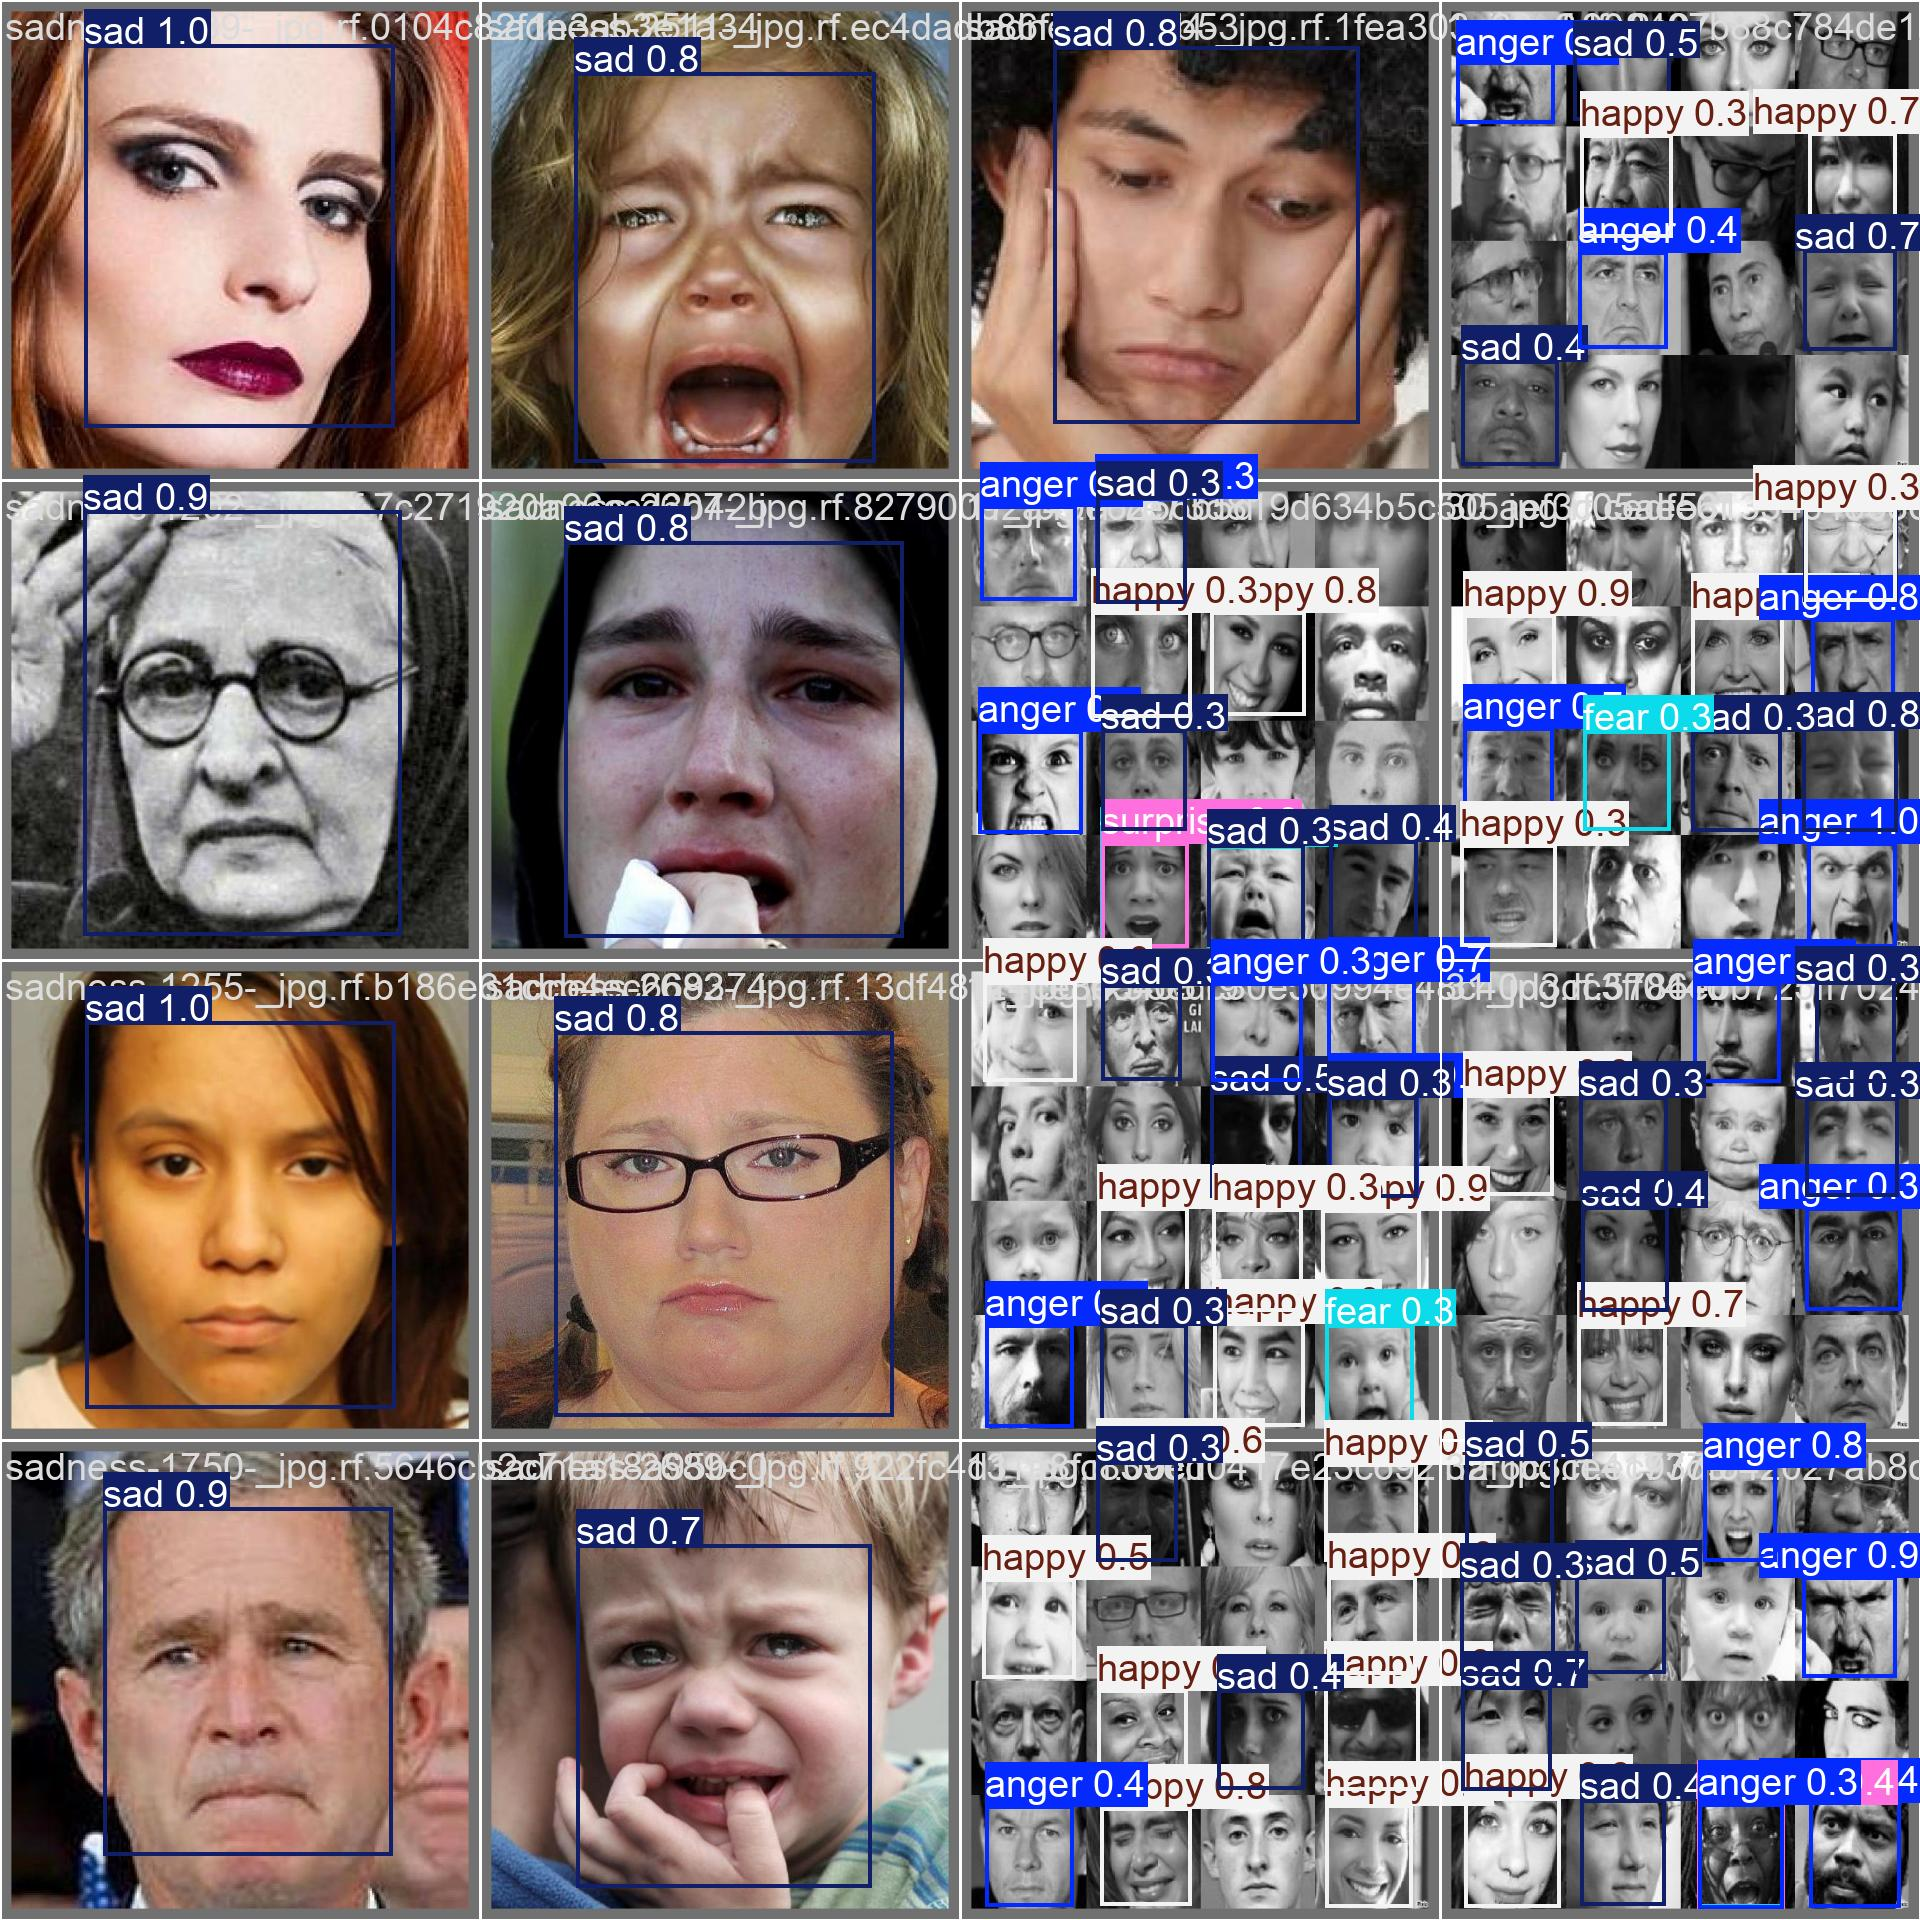

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

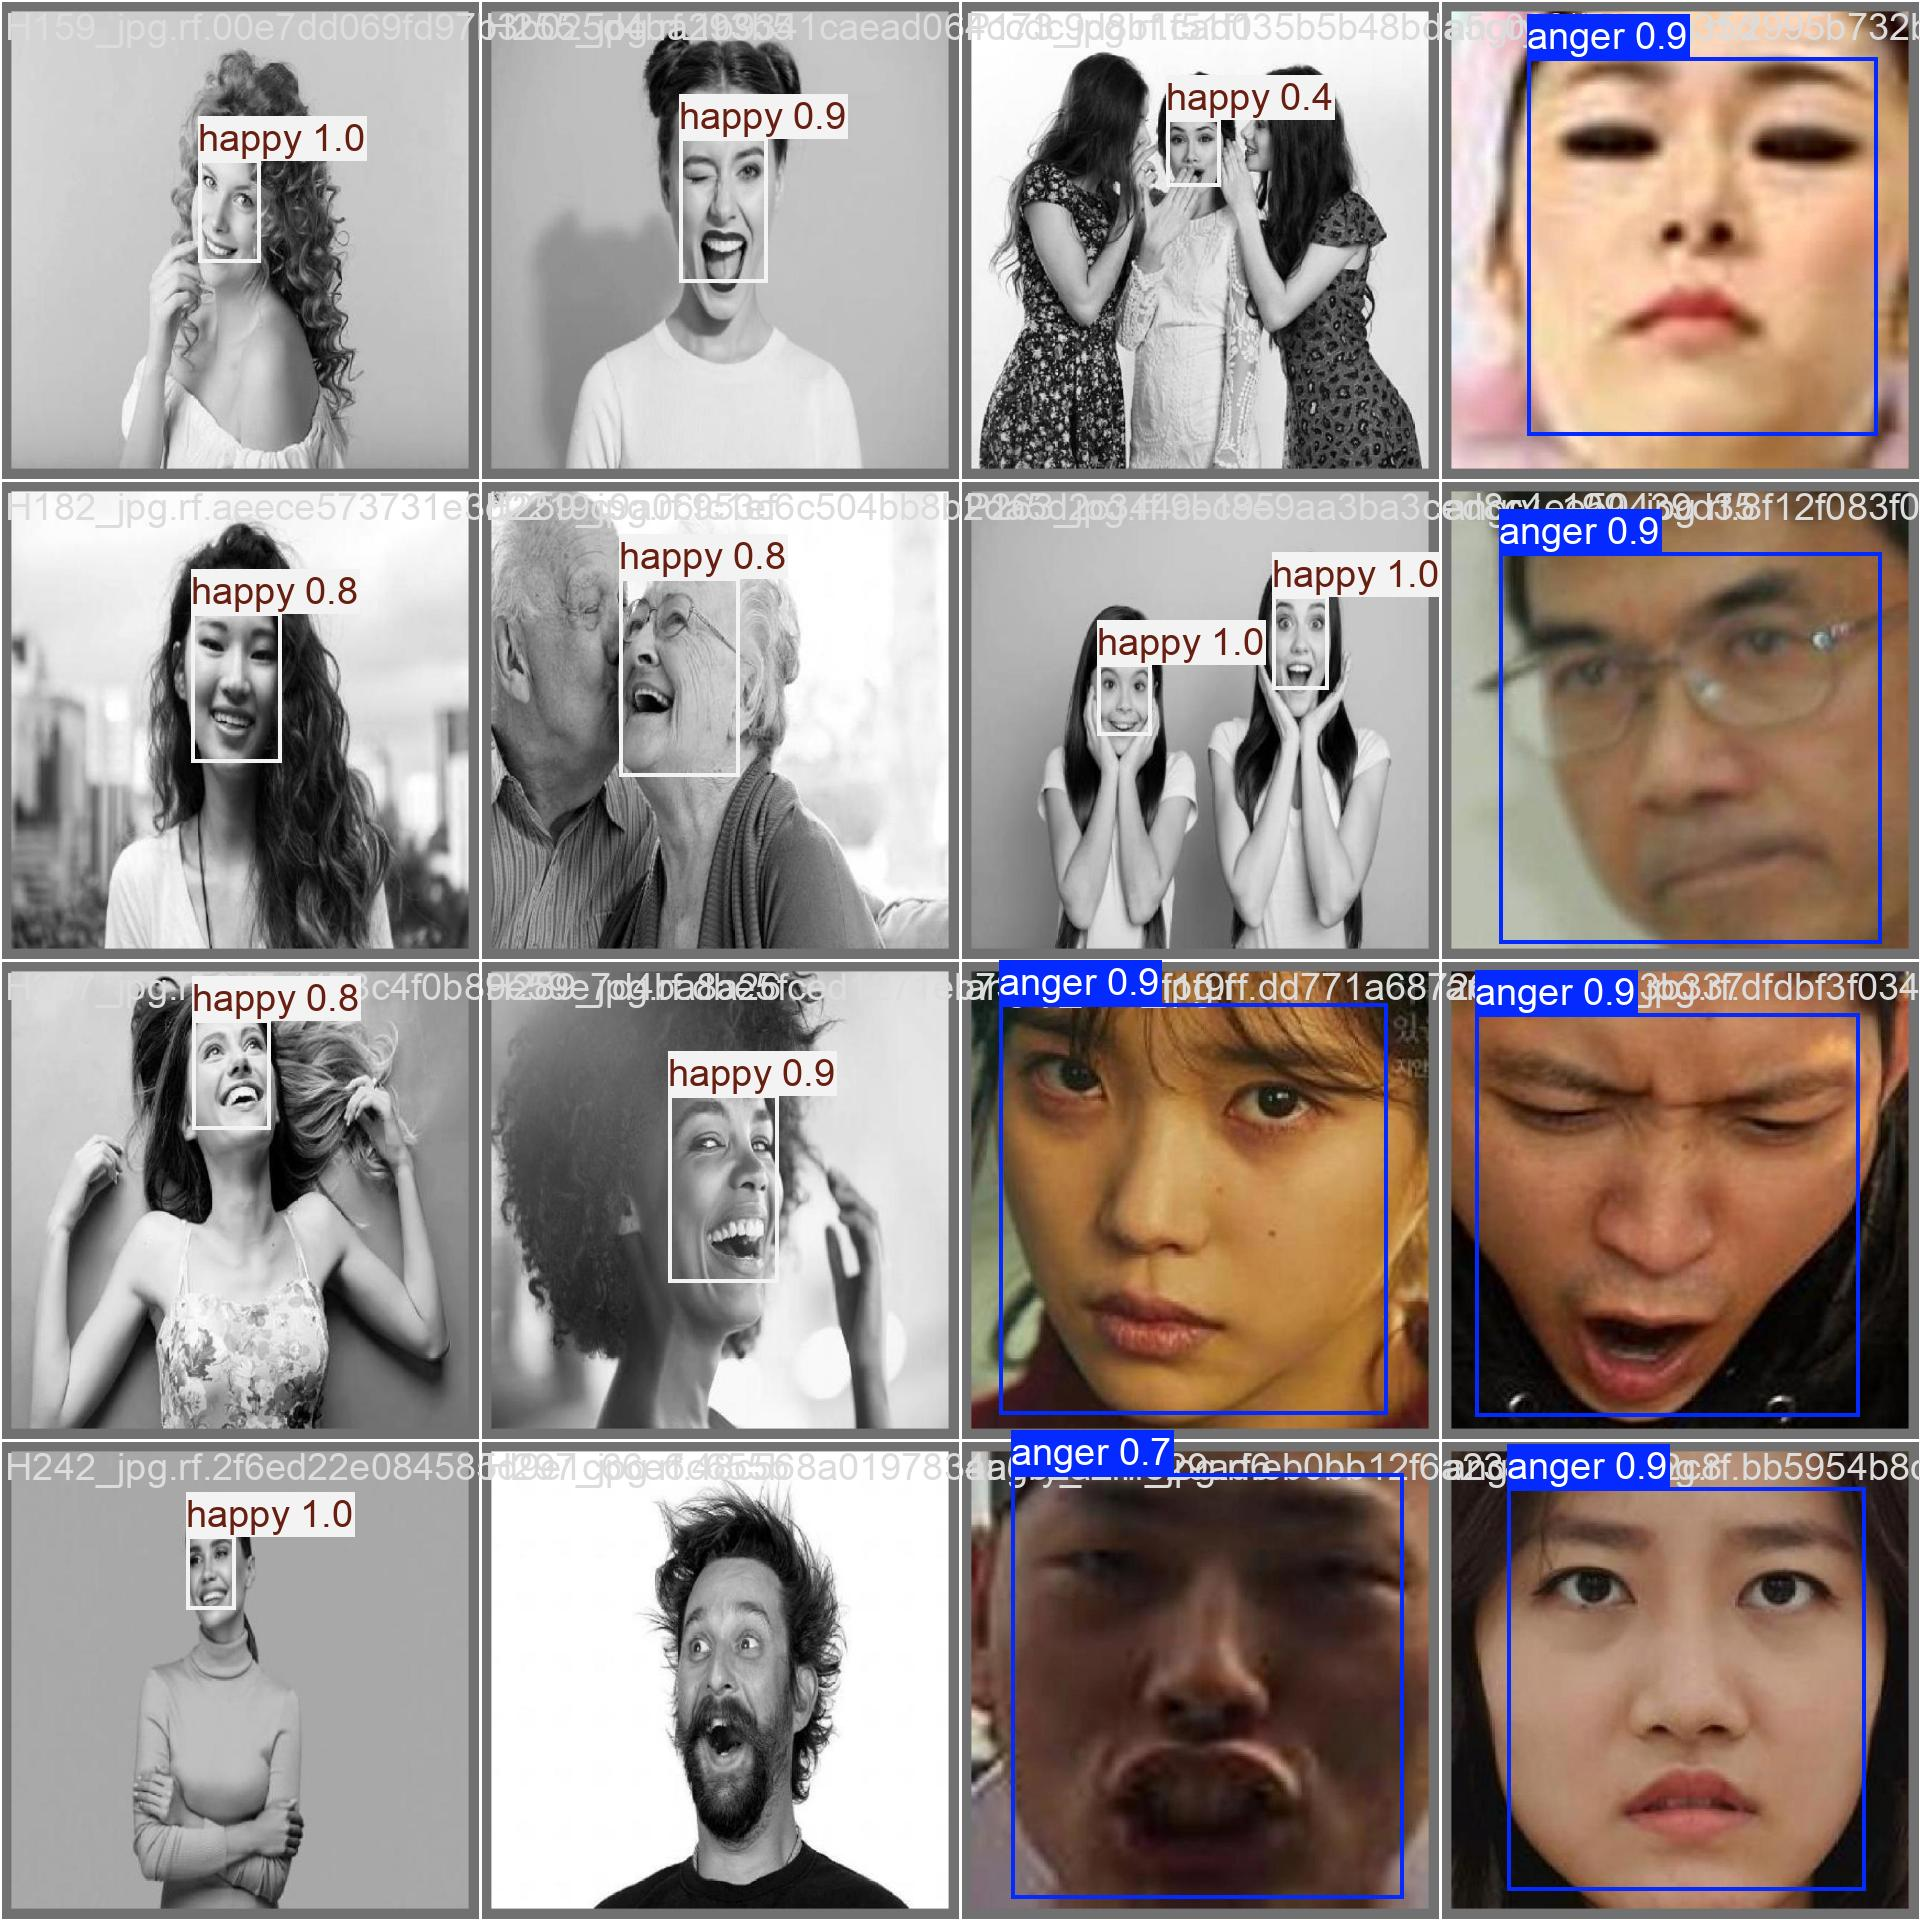

In [ ]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

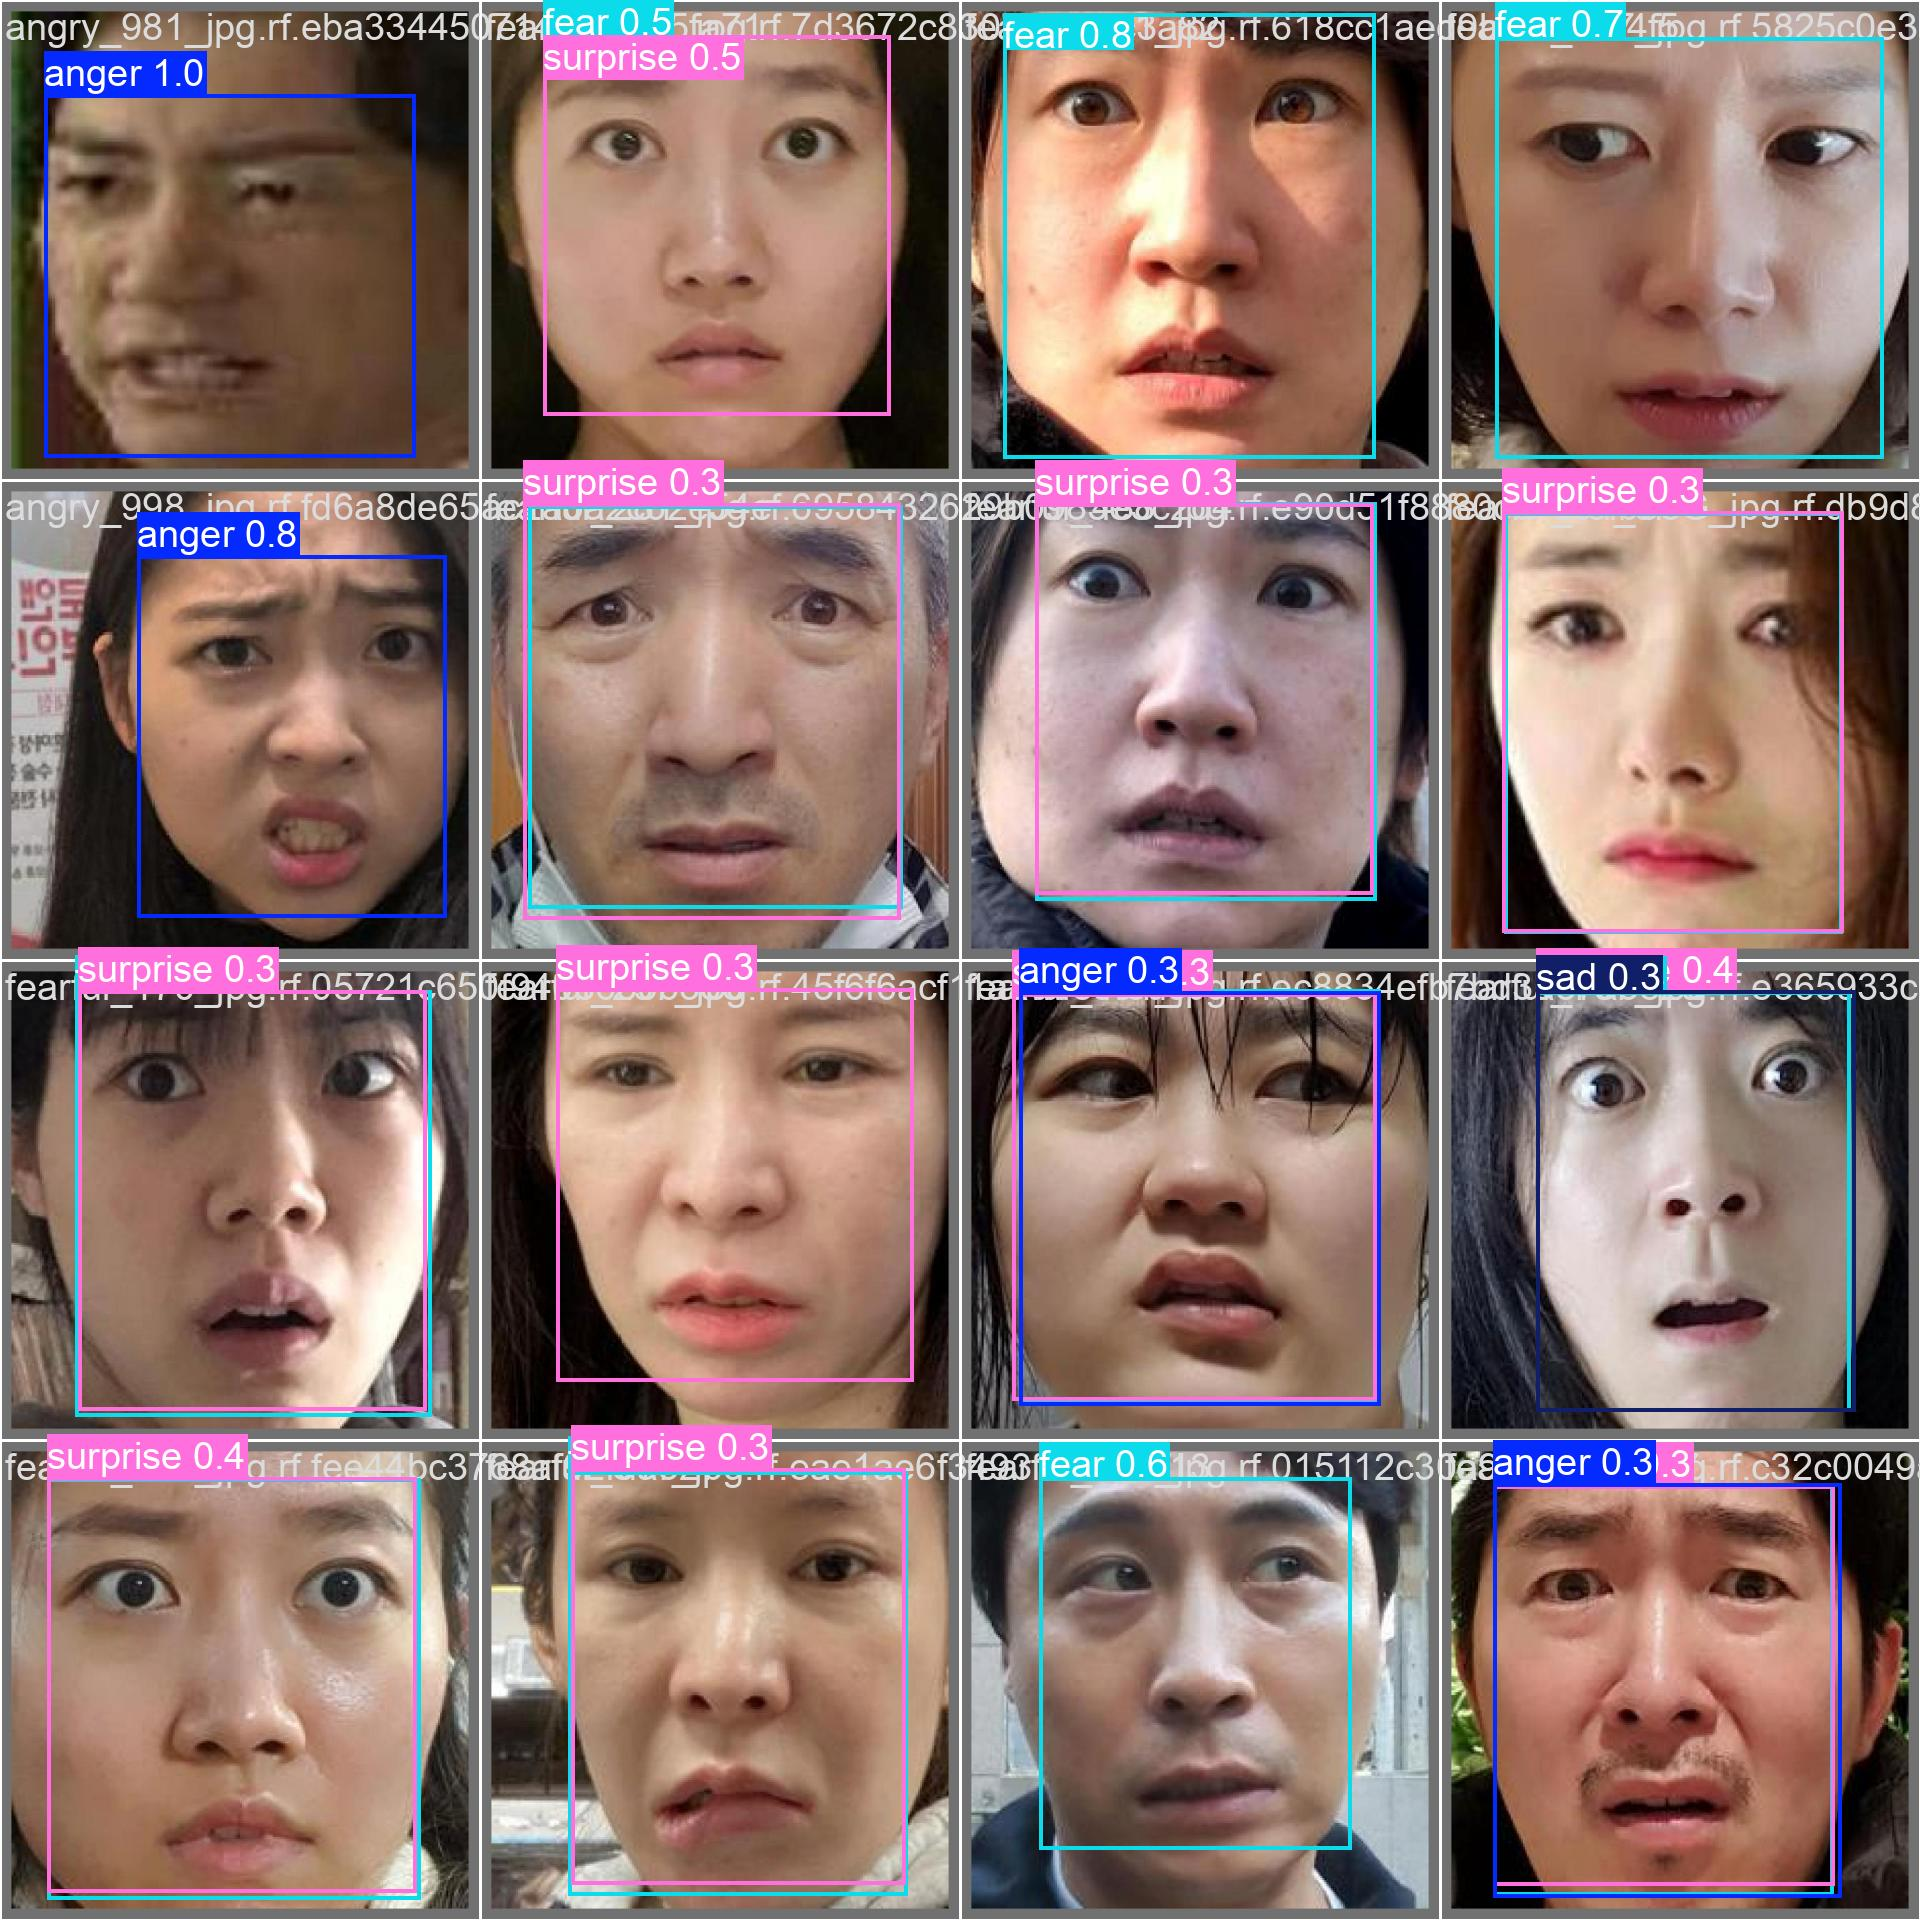

In [ ]:
Image("/content/runs/detect/train/val_batch2_pred.jpg", width=600)

**Step # 06 Download the Model Weights from the Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mv /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/KECERDASANBUATAN

In [ ]:
!gdown "https://drive.google.com/uc?id=1bxPduU-rP6-WPnIX-DTRcII9AUYj7ekp&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=1bxPduU-rP6-WPnIX-DTRcII9AUYj7ekp&confirm=t
To: /content/best.pt
100% 5.48M/5.48M [00:00<00:00, 271MB/s]


**Step # 07  Validate Fine-Tuned Model**

In [ ]:
!yolo task=detect mode=val model="best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Expression-1/valid/labels.cache... 114 images, 0 backgrounds, 0 corrupt: 100% 114/114 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:04<00:00,  1.76it/s]
                   all        114        717      0.447      0.693      0.609      0.438
                 anger         61        147      0.401       0.81      0.692      0.499
                  fear         54        119       0.61      0.571      0.665      0.494
                 happy         56        165       0.63      0.812      0.826      0.588
               neutral         42        171      0.356      0.369       0.37      0.258
                   sad         51        115      0.239      0.904       0.49       0.35
Speed: 2.4ms preprocess, 7.7ms inference, 0.0ms los

**Step # 08 Inference with Custom Model on Images**

In [ ]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

image 1/54 /content/Expression-1/test/images/10_jpg.rf.702936459e27c22cacbaea38e27ada77.jpg: 640x640 4 angers, 1 happy, 1 neutral, 5 sads, 12.4ms
image 2/54 /content/Expression-1/test/images/15_jpg.rf.42e2dfebbc3f22932762131d346c4518.jpg: 640x640 3 angers, 4 happys, 4 sads, 9.2ms
image 3/54 /content/Expression-1/test/images/1_jpg.rf.e13f84a7722acdeae55e2f3a1dfa4ed8.jpg: 640x640 3 angers, 2 fears, 3 happys, 6 sads, 9.9ms
image 4/54 /content/Expression-1/test/images/20_jpg.rf.522ae73fb717b00e68d6cb9f3fe4c21b.jpg: 640x640 1 anger, 3 happys, 3 sads, 8.5ms
image 5/54 /content/Expression-1/test/images/20_jpg.rf.5e7c287dc416921ca8c426aa90cb3253.jpg: 640x640 1 anger, 2 fears, 5 happys, 3 sads, 2 surprises, 8.6ms
image 6/54 /content/Expression-1/test/images/34_jpg.rf.b086718bf87672e33fe650c6b7594e12.jpg: 640x640 2 angers, 1 fear, 4

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

ValueError: max() arg is an empty sequence

In [ ]:
!gdown "https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t
To: /content/image2.jpg
100% 77.7k/77.7k [00:00<00:00, 90.7MB/s]


In [ ]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source=image2.jpg save=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/image2.jpg: 640x640 6 Protective Bootss, 3 Protective Helmets, 8 Safety Vests, 12.2ms
Speed: 2.7ms preprocess, 12.2ms inference, 725.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


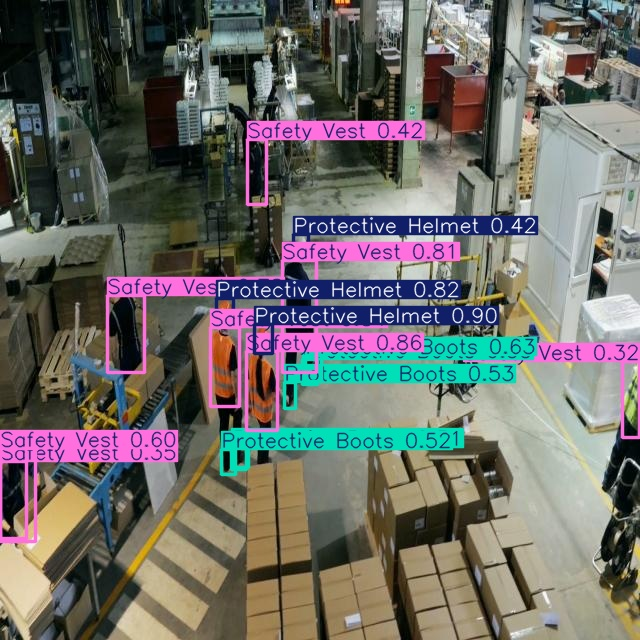

In [ ]:
Image("/content/runs/detect/predict2/image2.jpg", width=600)

**Step # 08 Inference with Custom Model on Videos**

In [ ]:
!gdown "https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t
To: /content/PPE_Part1.mp4
100% 14.2M/14.2M [00:00<00:00, 26.8MB/s]


In [ ]:
!gdown "https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t
To: /content/PPE_Part2.mp4
100% 11.1M/11.1M [00:00<00:00, 16.8MB/s]


In [ ]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source="PPE_Part1.mp4" save=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/310) /content/PPE_Part1.mp4: 384x640 2 Protective Helmets, 3 Safety Vests, 44.8ms
video 1/1 (frame 2/310) /content/PPE_Part1.mp4: 384x640 2 Protective Helmets, 2 Safety Vests, 13.2ms
video 1/1 (frame 3/310) /content/PPE_Part1.mp4: 384x640 3 Protective Helmets, 2 Safety Vests, 8.8ms
video 1/1 (frame 4/310) /content/PPE_Part1.mp4: 384x640 3 Protective Helmets, 2 Safety Vests, 11.2ms
video 1/1 (frame 5/310) /content/PPE_Part1.mp4: 384x640 3 Protective Helmets, 2 Safety Vests, 11.6ms
video 1/1 (frame 6/310) /content/PPE_Part1.mp4: 384x640 3 Protective Helmets, 2 Safety Vests, 11.1ms
video 1/1 (frame 7/310) /content/PPE_Part1.mp4: 384x640 4 Protective Helmets, 3 Safety Vests, 10.7ms
video 1/1 (frame 8/310) /content/PPE_Part1.mp4: 384x640 3 Protective Helmets, 4 Safety Vests, 13.4ms
video 1/1 (frame 9/310) /co

In [ ]:
!rm '/content/result_compressed.mp4'

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/PPE_Part1.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
!yolo task=detect mode=predict model=best.pt conf=0.25 source="PPE_Part2.mp4" save=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/267) /content/PPE_Part2.mp4: 384x640 (no detections), 87.5ms
video 1/1 (frame 2/267) /content/PPE_Part2.mp4: 384x640 (no detections), 22.7ms
video 1/1 (frame 3/267) /content/PPE_Part2.mp4: 384x640 (no detections), 48.1ms
video 1/1 (frame 4/267) /content/PPE_Part2.mp4: 384x640 (no detections), 13.9ms
video 1/1 (frame 5/267) /content/PPE_Part2.mp4: 384x640 1 Protective Helmet, 1 Safety Vest, 53.4ms
video 1/1 (frame 6/267) /content/PPE_Part2.mp4: 384x640 (no detections), 12.8ms
video 1/1 (frame 7/267) /content/PPE_Part2.mp4: 384x640 (no detections), 12.2ms
video 1/1 (frame 8/267) /content/PPE_Part2.mp4: 384x640 (no detections), 10.5ms
video 1/1 (frame 9/267) /content/PPE_Part2.mp4: 384x640 (no detections), 12.7ms
video 1/1 (frame 10/267) /content/PPE_Part2.mp4: 384x640 (no detections), 12.3ms
video 1/1 (fra

In [ ]:
!rm '/content/result_compressed.mp4'

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict5/PPE_Part2.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)